In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# local imports
from utilities import utilities

## Alguns parametros especificos para este dataset

In [3]:
path = 'physiobank_tool/drivedb'
number_of_segments = 120
low_cut = 0.1

## Lendo os arquivos que contém o sinal

In [4]:
files = []
with open(path+'/header.txt') as f:
    reader = csv.reader(f)
    for row in reader:
        #print(row)
        files.append(row[0])
print("Read data for the following drivers:\n", files)

Read data for the following drivers:
 ['drive01', 'drive02', 'drive04', 'drive05', 'drive06', 'drive07', 'drive08', 'drive09', 'drive10', 'drive11', 'drive12', 'drive13', 'drive15', 'drive16', 'drive17']


## Importando os arquivos para um DataFrame

In [5]:
def read_file(file_name):
    ''' docstring here later '''
    cols_of_interest = [0,1,2]
    ecg_data = pd.read_csv(f'{path}/{file_name}.csv', usecols=cols_of_interest)
    # drop useless header
    ecg_data = ecg_data.drop(ecg_data.index[0])
    # name columns
    ecg_data.columns = ['time', 'ECG', 'ECGF']
    # cast some columns to float
    ecg_data['time'] = ecg_data['time'].astype(float)
    ecg_data['ECG'] = ecg_data['ECG'].astype(float)
    
    return ecg_data

In [6]:
def run(ecg_data, file_name, number_of_segments, low_cut):
    """adiciona a docstring aqui depois"""
    sample_rate = utilities.detect_sample_rate(ecg_data)
    print(sample_rate)
    high_cut = sample_rate/3.0
    
    data_preparation_pipeline = Pipeline([
        ('filtering', utilities.Filter(sample_rate, low_cut, high_cut)),
        ('feature_detection', utilities.FeatureExtractor(number_of_segments, sample_rate)),
        ])

    extracted_features_df = data_preparation_pipeline.fit_transform(ecg_data['ECG'])
    #print(extracted_features_df)
    #extracted_features_df.to_csv(f"{path}_output/{file_name}.csv")
    extracted_features_df.reset_index(drop=True, inplace=True)
    return extracted_features_df

In [7]:
features_df = pd.DataFrame()
for file in files:
    ecg_data = read_file(file)
    #plt.plot(ecg_data['ECG'][:10000])
    current_df = run(ecg_data, file, number_of_segments, low_cut)
    current_df['person'] = file
    features_df = pd.concat([current_df, features_df], ignore_index=True)

/home/renato/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


1984


/home/renato/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/renato/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/renato/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


496
496
496
496
496
496
496
496
496
357
496
481
496
480


## dando uma olhada no signal e a filtragem obtida:

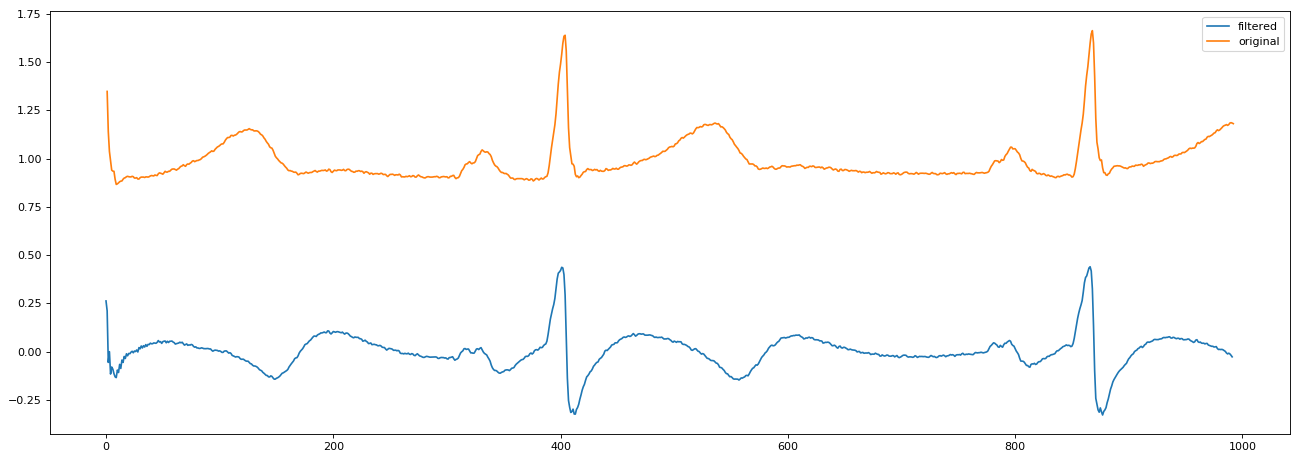

In [26]:
ecg_data = read_file(files[2])
sample_rate = utilities.detect_sample_rate(ecg_data)
two_seconds = ecg_data['ECG'][0:sample_rate*2]
filter = utilities.Filter(sample_rate, 2, sample_rate/2.1)
filtered_two_seconds = filter.fit_transform(two_seconds)

fig=plt.figure(figsize=(20, 7), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(filtered_two_seconds, label='filtered')
plt.plot(two_seconds+1.0, label='original')
plt.legend()